### Задача 2. Влияние спорта, диеты и возраста на экспрессию генов

### 2A.
Все датасеты для анализа в папке Диеты и спорт 
Сделать пересечение новых датасетов по диетам и возрастным изменениям diet_mouse_muscle и expression_mouse_muscle 
Сделать пересечение списков sport_human_muscle и expression_human_muscle 
Полученные списки генов пересечь между собой (взять колонки Gene, там человеческие символы генов). Нужно получить 4 таблицы с общими генами и колонками из 4-х исходных таблиц.
Построить такой график: по оси X возрастное изменение у мыши, изменение после диеты у мыши, возрастное изменение у человека, изменение после спорта у человека. А по оси Y гены. На графике пиксели, закрашенные красным (увеличение экспрессии), и зеленым (снижение экспрессии), а интенсивность заливки показывает процент. Для генов с несколькими записями — средний процент.
Снова взять списки генов, полученные в первых двух задачах (диета и возраст у мыши, спорт и возраст у человека). Каждый из этих списков генов отдельно пересечь с датасетом lifespans_mammals. 
Построить 2 графика как из задачи 4: 1) X — изменение экспрессии у мыши с возрастом и после диеты для генов, которые влияют на продолжительность жизни мыши (гены из lifespans_mammals), Y — гены, квадраты — изменение экспрессии; 2) X — изменение экспрессии генов у человека с возрастом и после спорта для генов, которые влияют на продолжительность жизни мыши, Y — гены, квадраты — изменение экспрессии.

В этих датасетах во всех одна и та же ткань, поэтому можно попробовать усреднить процент, даже если один положительный другой отрицательный. Я потом отдельно посмотрю из получившихся списков гены с противоречивыми данными по экспрессии, если такие все равно останутся, и подумаю что с ними лучше сделать. 

Потом можно будет добавлять вмешательства на ось X и смотреть как старение и разные анти-эйджинг терапии влияют на экспрессию одних и тех же генов.


### Содержание

1. [Шаг 1. Откроем файл с данными и изучим общую информацию.](#Шаг-1.-Откроем-файл-с-данными-и-изучим-общую-информацию)
2. [Шаг 2. Создадим датасеты с уникальными генами](#Шаг-2.-Создадим-датасеты-с-уникальными-генами)
3. [Шаг 2.1. Создадим датасет mouse_genes с уникальными генами, которые есть в таблицах diet_mouse_muscle и expression_mouse_muscle](#Шаг-2.1.-Создадим-датасет-mouse_genes-с-уникальными-генами,-которые-есть-в-таблицах-diet_mouse_muscle-и-expression_mouse_muscle)
4. [Шаг 2.2. Создадим датасет human_genes с уникальными генами, которые есть в таблицах sport_human_muscle и expression_human_muscle](#Шаг-2.2.-Создадим-датасет-human_genes-с-уникальными-генами,-которые-есть-в-таблицах-sport_human_muscle-и-expression_human_muscle)
5. [Шаг 2.3. Создадим датасет с уникальными генами, которые есть в таблицах diet_mouse_muscle, expression_mouse_muscle, sport_human_muscle и expression_human_muscle](#Шаг-2.3.-Создадим-датасет-с-уникальными-генами,-которые-есть-в-таблицах-diet_mouse_muscle,-expression_mouse_muscle,-sport_human_muscle-и-expression_human_muscle)
6. [Шаг 2.4. Создание датасетов, с одинаковыми генами из датасета genes и проверка количества генов не единичной записью](#Шаг-2.4.-Создание-датасетов,-с-одинаковыми-генами-из-датасета-genes-и-проверка-количества-генов-не-единичной-записью)
7. [Шаг 3. Построение графика Heatmap зависимость общих для 4х таблиц генов от возрастных изменений у мыши, изменений после диеты у мыши, возрастных изменений у человека, изменений после спорта у человека](#Шаг-3.-Построение-графика-Heatmap-зависимость-общих-для-4х-таблиц-генов-от-возрастных-изменений-у-мыши,-изменений-после-диеты-у-мыши,-возрастных-изменений-у-человека,-изменений-после-спорта-у-человека)
8. [Шаг 4. Откроем файл с данными таблицы lifespan_mammals и создадим датасеты, с одинаковыми генами между таблицей lifespan_mammals и датасетом mouse_genes и таблицей lifespan_mammals и датасетом human_genes](#Шаг-4.-Откроем-файл-с-данными-таблицы-lifespan_mammals-и-создадим-датасеты,-с-одинаковыми-генами-между-таблицей-lifespan_mammals-и-датасетом-mouse_genes-и-таблицей-lifespan_mammals-и-датасетом-human_genes)
9. [Шаг 5. Построение графиков Heatmap зависимость общих для 3х таблиц генов для мыши и для людей](#Шаг-5.-Построение-графиков-Heatmap-зависимость-общих-для-3х-таблиц-генов-для-мыши-и-для-людей)
10. [Шаг 5.1. Построение графика Heatmap зависимость общих для 3х таблиц генов для мыши от возрастных изменений у мыши и изменений после диеты у мыши](#Шаг-5.1.-Построение-графика-Heatmap-зависимость-общих-для-3х-таблиц-генов-для-мыши-от-возрастных-изменений-у-мыши-и-изменений-после-диеты-у-мыши)
11. [Шаг 5.2. Построение графика Heatmap зависимость общих для 3х таблиц генов для человека от возрастных изменений у человека, изменений после спорта у человека](#Шаг-5.2.-Построение-графика-Heatmap-зависимость-общих-для-3х-таблиц-генов-для-человека-от-возрастных-изменений-у-человека,-изменений-после-спорта-у-человека)
12. [Шаг 6. Сохранение 4х исходных таблиц с общим 41 геном](#Шаг-6.-Сохранение-4х-исходных-таблиц-с-общим-41-геном)

### Шаг 1. Откроем файл с данными и изучим общую информацию.

In [1]:
pip install pivottablejs

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pivottablejs import pivot_ui 

 #### Cохраним датасеты в переменные (используем с диска датасеты diet_mouse_muscle переименуем в diet_m, expression_mouse_muscle переименуем в exp_m,  sport_human_muscle переименуем в sport_h и expression_human_muscle переименуем в expr_h)

In [3]:
url_dm = 'https://docs.google.com/spreadsheets/d/1kqdChg1B4KM_7HEuBdvFKGKUd4GdwUEY/edit?usp=sharing&ouid=116719183898603920666&rtpof=true&sd=true'

path = 'https://drive.google.com/uc?id='+url_dm.split('/')[-2]
diet_m = pd.read_excel(path)

In [4]:
url_exm = 'https://docs.google.com/spreadsheets/d/1f90yJE6KLOysf2Q9UcryvsC02kIWvJEc/edit?usp=sharing&ouid=116719183898603920666&rtpof=true&sd=true'

path = 'https://drive.google.com/uc?id='+url_exm.split('/')[-2]
exp_m = pd.read_excel(path)

In [5]:
url_sph = 'https://docs.google.com/spreadsheets/d/17rWGkTN1S9vbfV6gKOmcCC9P_Sp9Bm1XCiVSNcdcUrg/edit#gid=0'
    
url_2 = url_sph.replace('/edit#gid=', '/export?format=csv&gid=')
sport_h = pd.read_csv(url_2)

In [6]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1zmqv_ptBLm49C3EsrnjCmNYjoLd6h53eSg1xIaat6MY/edit#gid=0'

url_1 = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
expr_h = pd.read_csv(url_1)

Был проведен анализ таблиц

#### Вывод: 

####    таблица diet_m (2674): Уникальных Gene = 2094; 
                    restriction_time (Ограничение по времени диеты): 20 дней = 1969, вся жизнь = 705; 
                    measurement method (Метод измерения): microarray = 705, RNAseq = 1969
                    age (Возраст): 6-7_weeks = 705, 20_weeks = 1203, 80_weeks = 766
                    effect: increase = 1378, decrease = 1296
                    line: C57BL/6J = 1969, C57BL/6NHsd = 705
                    sex: both = 1969, male = 705
                    sample: muscle = 1969, gastrocnemius muscle = 705
                    N control: 1900-01-05 = 705?, 2023-06-08 = 1969
                    link: 10.3390/genes12050691 = 1969, 10.1186/1471-2164-8-80 = 705
                    
####    Таблица exp_m (1049): Уникальных Gene = 816
                    line: C57BL/6NHsd = 705, C57BL/6 = 197, C57BL/6J = 142, CD1 = 2, vDBA/2JNIA = 2, BALB/c = 1
                    sex: male = 932, both = 111, female = 4, nan = 2
                    effect: increase = 532, decrease = 517
                    p value: 105
                    posterior probability: 705
                    experiment cohort size: 997
                    statistical method: empirical Bayes hierarchical modeling = 705, Student t-test = 187
                    doi: 10.1186/1471-2164-8-80 = 706, 10.1186/s12863-018-0660-5 = 187, 10.3390/genes12050691 = 105,
                        10.1007/s11357-014-9618-3 = 37, 10.1016/j.exger.2005.10.003 = 2, 10.1111/acel.13370 = 2,
                        10.14814/phy2.13445 = 2, 10.1091/mbc.E04-08-0720 = 2, 10.18632/oncotarget.19854 = 1,
                        10.1074/jbc.M110.106708 = 1, 10.18632/aging.100677 = 1, 10.1038/s41598-019-42064-6 = 1,
                        10.1126/science.abc8059 = 1, 10.1016/j.cmet.2010.11.007 = 1 
                    source: dataset = 997, database = 52
                    
####    Таблица sport_h (4368): Уникальных Gene = 4159
                    result: increase = 2349, decrease = 2018
                    measurement_method: RNAseq = 4189, microarray, qRT-PCR = 178
                    time_point (291): at the end of the experiment = 178, 4h after exercise = 58, 8h after exercise = 55
                    sport_duration: 8100 min = 4076, 26 weeks = 178
                    training_regimen: 45 sessions x 45 min (4 per week) = 4076, resistance exercise 2 times a week = 178,
                    intensive cycling session (70 min, 70% V˙O2max; n=2) = 113
                    sex: both = 4254, male = 113 
                    participants (Участники): no = 4254, yes = 113
                    age: 27 = 4076, 65-79 = 178, 20-27 = 113
                    experiment_groups_quantity (Количество экспериментальных групп): 17.0 = 4076, 14.0 = 178, 10.0 = 113
                    link: 10.4161/15592294.2014.982445 = 4076, 10.1371/journal.pone.0000465 = 178, 
                    10.5114/biolsport.2018.77828 = 113
                    
####     Таблица expr_h (964): Уникальных Gene = 846
                    sex: male = 458, both = 453, female = 49
                    change type: increased gene expression = 537, decreased gene expression = 424, 
                    decreased protein activity = 2, increased gene methylation = 1
                    age of control - min: 21.0 = 452, 18.0 = 449, 20.0 = 45
                    age of control - mean: 24.0 = 5, 25.0 = 3, 23.0 = 2, 21.0 = 2, 20.0 = 1, 30.0 = 1, 28.0 = 1, 26.0 = 1
                    age of experiment - max: 75.0 = 452, 84.0 = 449, 71.0 = 45
                    control cohort size: 8.0 = 452, 26.0 = 449, 7.0 = 45
                    statistical method: Wilcoxon test, Student t-test, Wilcoxon Rank Sum Test = 497,
                    Student t-test = 449
                    expression evaluation by (оценка выражения): mRNA = 954, protein = 9
                    measurement method: microarray = 938, microarray, qPCR = 8
                    doi: 10.1152/physiolgenomics.00049.2003 = 454, 10.1371/journal.pone.0000465 = 449,

### Шаг 2. Создадим датасеты с уникальными генами

### Шаг 2.1. Создадим датасет mouse_genes с уникальными генами, которые есть в таблицах diet_mouse_muscle и expression_mouse_muscle

In [7]:
diet_g = diet_m['Gene'].unique()

diet_g = pd.DataFrame(diet_g, columns = ['Gene'])
diet_g.value_counts()

Gene  
AARS1     1
PTPRS     1
PTPN4     1
PTPN21    1
PTPN12    1
         ..
GPAM      1
GOT2      1
GOT1      1
GOLPH3    1
ZRANB1    1
Length: 2094, dtype: int64

In [8]:
expr_mouse = exp_m['Gene'].unique()

expr_mouse = pd.DataFrame(expr_mouse, columns = ['Gene'])
expr_mouse.value_counts()

Gene   
AARS1      1
POU2AF1    1
PLN        1
PLTP       1
PLVAP      1
          ..
FLT1       1
FLT4       1
FMOD       1
FMR1       1
ZRANB1     1
Length: 816, dtype: int64

In [9]:
mouse_genes = pd.merge(diet_g, expr_mouse, on = 'Gene', how = 'inner')
mouse_genes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 681 entries, 0 to 680
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gene    680 non-null    object
dtypes: object(1)
memory usage: 10.6+ KB


#### Вывод: 680 генов присутствуют в таблицах diet_mouse_muscle и expression_mouse_muscle

### Шаг 2.2. Создадим датасет human_genes с уникальными генами, которые есть в таблицах sport_human_muscle и expression_human_muscle

In [10]:
sport_g = sport_h['Gene'].unique()

sport_g = pd.DataFrame(sport_g, columns = ['Gene'])
sport_g.value_counts()

Gene   
A2LD1      1
PLEKHG2    1
PITPNM2    1
PITX2      1
PJA2       1
          ..
GATM       1
GATSL2     1
GBE1       1
GBP2       1
ZZZ3       1
Length: 4159, dtype: int64

In [11]:
exp_hum = expr_h['Gene'].unique()

exp_hum = pd.DataFrame(exp_hum, columns = ['Gene'])
exp_hum.value_counts()

Gene   
AARS1      1
RAB13      1
PMP22      1
POLE4      1
POLI       1
          ..
GLG1       1
GLRX2      1
GLRX3      1
GNPNAT1    1
ZSCAN5A    1
Length: 846, dtype: int64

In [12]:
human_genes = pd.merge(sport_g, exp_hum, on = 'Gene', how = 'inner')
human_genes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 367 entries, 0 to 366
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gene    367 non-null    object
dtypes: object(1)
memory usage: 5.7+ KB


#### Вывод: 367 генов присутствуют в таблицах sport_human_muscle и expression_human_muscle

### Шаг 2.3. Создадим датасет с уникальными генами, которые есть в таблицах diet_mouse_muscle, expression_mouse_muscle, sport_human_muscle и expression_human_muscle

In [13]:
genes = pd.merge(mouse_genes, human_genes, on = 'Gene', how = 'inner')
genes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 0 to 40
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gene    41 non-null     object
dtypes: object(1)
memory usage: 656.0+ bytes


#### Вывод: Mежду датасетами mouse_genes и human_genes общих 41 ген.

### Шаг 2.4. Создание датасетов, с одинаковыми генами из датасета genes и проверка количества генов не единичной записью

In [14]:
diet_m_2 = pd.merge(diet_m, genes, on = 'Gene', how = 'inner')
exp_m_2 = pd.merge(exp_m, genes, on = 'Gene', how = 'inner')
sport_h_2 = pd.merge(sport_h, genes, on = 'Gene', how = 'inner')
expr_h_2 = pd.merge(expr_h, genes, on = 'Gene', how = 'inner')

In [15]:
diet_m_2_count = diet_m_2["Gene"].value_counts().copy()
diet_m_2_count = pd.DataFrame(diet_m_2_count, columns = ['Gene'])
diet_m_2_count[diet_m_2_count["Gene"] > 1].count()

Gene    14
dtype: int64

In [16]:
exp_m_2_count = exp_m_2["Gene"].value_counts().copy()
exp_m_2_count = pd.DataFrame(exp_m_2_count, columns = ['Gene'])
exp_m_2_count[exp_m_2_count["Gene"] > 1].count()

Gene    6
dtype: int64

In [17]:
sport_h_2_count = sport_h_2["Gene"].value_counts().copy()
sport_h_2_count = pd.DataFrame(sport_h_2_count, columns = ['Gene'])
sport_h_2_count[sport_h_2_count["Gene"] > 1].count()

Gene    7
dtype: int64

In [18]:
expr_h_2_count = expr_h_2["Gene"].value_counts().copy()
expr_h_2_count = pd.DataFrame(expr_h_2_count, columns = ['Gene'])
expr_h_2_count[expr_h_2_count["Gene"] > 1].count()

Gene    9
dtype: int64

#### Вывод: 
       в датасете diet_m_2 14 генов, которые встречаются в нем больше чем 1 раз. Всего записей 55. 
       в датасете exp_m_2 6 генов, которые встречаются в нем больше чем 1 раз. Всего записей 49. 
       в датасете sport_h_2 7 генов, которые встречаются в нем больше чем 1 раз. Всего записей 48. 
       в датасете expr_h_2 9 генов, которые встречаются в нем больше чем 1 раз. Всего записей 52. 

### Шаг 3. Построение графика Heatmap зависимость общих для 4х таблиц генов от возрастных изменений у мыши, изменений после диеты у мыши, возрастных изменений у человека, изменений после спорта у человека

In [19]:
diet_cp = diet_m_2[['Gene', 'change persontage']].copy()
diet_cp. rename(columns = {'change persontage':'change perсentage'}, inplace = True )
diet_cp = diet_cp.astype({'change perсentage': 'float64'})
diet_cp. rename(columns = {'change perсentage':'Diet mouse'}, inplace = True )

In [20]:
exp_m_cp = exp_m_2[['Gene', 'change percentage']].copy()
exp_m_cp = exp_m_cp.astype({'change percentage': 'float64'})
exp_m_cp. rename(columns = {'change percentage':'Age mouse'}, inplace = True )

In [21]:
sport_cp = sport_h_2[['Gene', 'change percentage']].copy()
sport_cp = sport_cp.astype({'change percentage': 'float64'})
sport_cp. rename(columns = {'change percentage':'Sport human'}, inplace = True )

In [22]:
exp_h_cp = expr_h_2[['Gene', 'change percentage']].copy()
exp_h_cp['change percentage'] = exp_h_cp['change percentage'].replace(to_replace ='%', value = '', regex = True)
exp_h_cp = exp_h_cp.astype({'change percentage': 'float64'})
exp_h_cp. rename(columns = {'change percentage':'Age human'}, inplace = True )

In [23]:
diet_percentage = pd.pivot_table(diet_cp, values=['Diet mouse'], 
                       index='Gene', aggfunc=np.mean)

exp_m_percentage = pd.pivot_table(exp_m_cp, values=['Age mouse'], 
                       index='Gene', aggfunc=np.mean)

sport_percentage = pd.pivot_table(sport_cp, values=['Sport human'], 
                       index='Gene', aggfunc=np.mean)

exp_h_percentage = pd.pivot_table(exp_h_cp, values=['Age human'], 
                       index='Gene', aggfunc=np.mean)

In [24]:
all_percentage = pd.merge(diet_percentage, exp_m_percentage, on = 'Gene', how = 'inner')

In [25]:
all_percentage = pd.merge(all_percentage, sport_percentage, on = 'Gene', how = 'inner')

In [26]:
all_percentage = pd.merge(all_percentage, exp_h_percentage, on = 'Gene', how = 'inner')

In [27]:
all_percentage_heatmap = pd.pivot_table(all_percentage, values=['Age mouse', 'Diet mouse', 'Age human', 'Sport human'], 
                       index='Gene', aggfunc=np.mean)

In [28]:
all_percentage = all_percentage.astype({'Age mouse': 'int64'})
all_percentage = all_percentage.astype({'Diet mouse': 'int64'})
all_percentage = all_percentage.astype({'Age human': 'int64'})
all_percentage = all_percentage.astype({'Sport human': 'int64'})

#### Две удобные функции для самостоятельной настройки палитры heatmap

In [29]:
sns.choose_diverging_palette ( as_cmap = False )

interactive(children=(IntSlider(value=220, description='h_neg', max=359), IntSlider(value=10, description='h_p…

[(0.2519971417644415, 0.4987337088076726, 0.5751602783606602),
 (0.43156001218774975, 0.6160490836499025, 0.6735874169971766),
 (0.611122882611058, 0.7333644584921324, 0.7720145556336929),
 (0.7906857530343663, 0.8506798333343624, 0.8704416942702093),
 (0.95, 0.95, 0.95),
 (0.9282549678814984, 0.7863704363662967, 0.7963965173228867),
 (0.9022582584936525, 0.6005186021022944, 0.622400049291663),
 (0.8762615491058064, 0.4146667678382919, 0.44840358126043944),
 (0.8510408608937171, 0.23436274952246883, 0.2796010376480583)]

In [30]:
sns. diverging_palette ( h_neg = 10 , h_pos = 143 , s = 75 , l = 50 , sep = 1 , n = 9 , as_cmap = False )

[(0.8545371341681446, 0.22957019267094914, 0.2762321841840895),
 (0.8786083292984945, 0.4089979499416368, 0.4439331018469961),
 (0.9030541676636002, 0.5912183145184783, 0.6142441106966727),
 (0.9271253627939503, 0.770646071789166, 0.7819450283595791),
 (0.936836660712425, 0.9501586511869765, 0.9412873761297308),
 (0.7512332025918863, 0.8438558325633798, 0.790571915015409),
 (0.5739193735644249, 0.7344519405453172, 0.6445727014414093),
 (0.3979854603154713, 0.6258994663645089, 0.4997097027896493),
 (0.22820233445133836, 0.5211420716908427, 0.3599112280160897)]

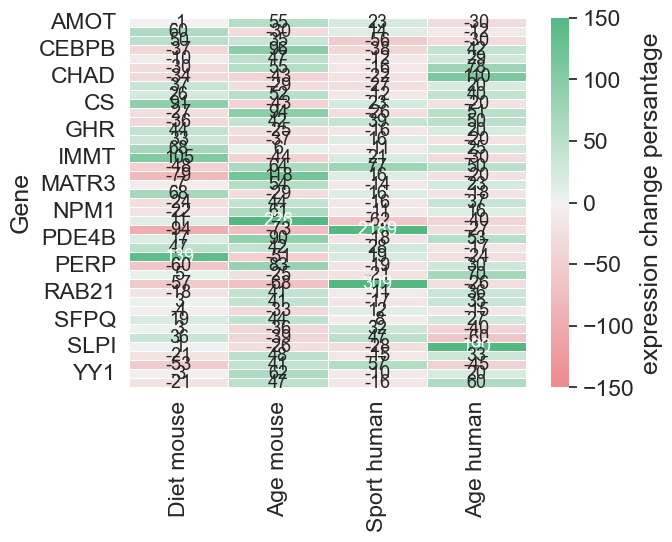

In [31]:
sns.set(font_scale=1.5)
sns.heatmap(all_percentage, cmap = sns. diverging_palette ( h_neg = 10 , h_pos = 143 , s = 75 , l = 68 , sep = 1 , n = 9 , as_cmap = True ), 
            vmin=-150, vmax=150, center= 0, linewidth=.5, cbar_kws={'label': 'expression change persantage'}, 
            annot = True, annot_kws={"size":13}, fmt='d')
sns.set(rc={'figure.figsize':(13,15)})

plt.show()

#### Вывод: На графике виден большой положительный выброс в столбце Sport human гена NR4A3

### Шаг 4. Откроем файл с данными таблицы lifespan_mammals и создадим датасеты, с одинаковыми генами между таблицей lifespan_mammals и датасетом mouse_genes и таблицей lifespan_mammals и датасетом human_genes

In [32]:
url_life = 'https://docs.google.com/spreadsheets/d/1zjtg1ZJ7sHTEM4sPYvX8cuaw9yge4x_jRKObMK68QzE/edit#gid=0'

url_1 = url_life.replace('/edit#gid=', '/export?format=csv&gid=')
life_m = pd.read_csv(url_1)

In [33]:
life_mouse = life_m[life_m['model organism'] == 'mouse'].copy()

In [34]:
lifespans_genes = life_mouse['Gene'].unique()

lifespans_genes = pd.DataFrame(lifespans_genes, columns = ['Gene'])
lifespans_genes.value_counts()

Gene    
ADCY5       1
POU1F1      1
PAWR        1
PCK1        1
PER2        1
           ..
GHRH        1
GHRHR       1
GMFB        1
GPX4        1
ZMPSTE24    1
Length: 155, dtype: int64

In [35]:
lifespans_mouse = pd.merge(mouse_genes, lifespans_genes, on = 'Gene', how = 'inner')

In [36]:
lifespans_mouse.count()

Gene    19
dtype: int64

In [37]:
lifespans_human = pd.merge(human_genes, lifespans_genes, on = 'Gene', how = 'inner')

In [38]:
lifespans_human.count()

Gene    12
dtype: int64

#### Вывод: 
        между таблицами мыши(диета+возраст) и lifespan = 19 общих генов
        между таблицами люди(спорт+возраст) и lifespan = 12 общих генов

### Шаг 5. Построение графиков Heatmap зависимость общих для 3х таблиц генов для мыши и для людей

In [39]:
diet_l = pd.merge(diet_m, lifespans_mouse, on = 'Gene', how = 'inner')
exp_m_l = pd.merge(exp_m, lifespans_mouse, on = 'Gene', how = 'inner')

In [40]:
sport_l = pd.merge(sport_h, lifespans_human, on = 'Gene', how = 'inner')
exp_h_l = pd.merge(expr_h, lifespans_human, on = 'Gene', how = 'inner')

### Шаг 5.1. Построение графика Heatmap зависимость общих для 3х таблиц генов для мыши от возрастных изменений у мыши и изменений после диеты у мыши 

In [41]:
diet_l_cp = diet_l[['Gene', 'change persontage']].copy()
diet_l_cp. rename(columns = {'change persontage':'change perсentage'}, inplace = True )
diet_l_cp = diet_l_cp.astype({'change perсentage': 'float64'})
diet_l_cp. rename(columns = {'change perсentage':'Diet mouse'}, inplace = True )

In [42]:
exp_ml_cp = exp_m_l[['Gene', 'change percentage']].copy()
exp_ml_cp = exp_ml_cp.astype({'change percentage': 'float64'})
exp_ml_cp. rename(columns = {'change percentage':'Age mouse'}, inplace = True )

In [43]:
diet_l_percentage = pd.pivot_table(diet_l_cp, values=['Diet mouse'], 
                       index='Gene', aggfunc=np.mean)

exp_ml_percentage = pd.pivot_table(exp_ml_cp, values=['Age mouse'], 
                       index='Gene', aggfunc=np.mean)

In [44]:
mouse_percentage = pd.merge(diet_l_percentage, exp_ml_percentage, on = 'Gene', how = 'inner')

In [45]:
mouse_percentage = mouse_percentage.astype({'Age mouse': 'int64'})
mouse_percentage = mouse_percentage.astype({'Diet mouse': 'int64'})

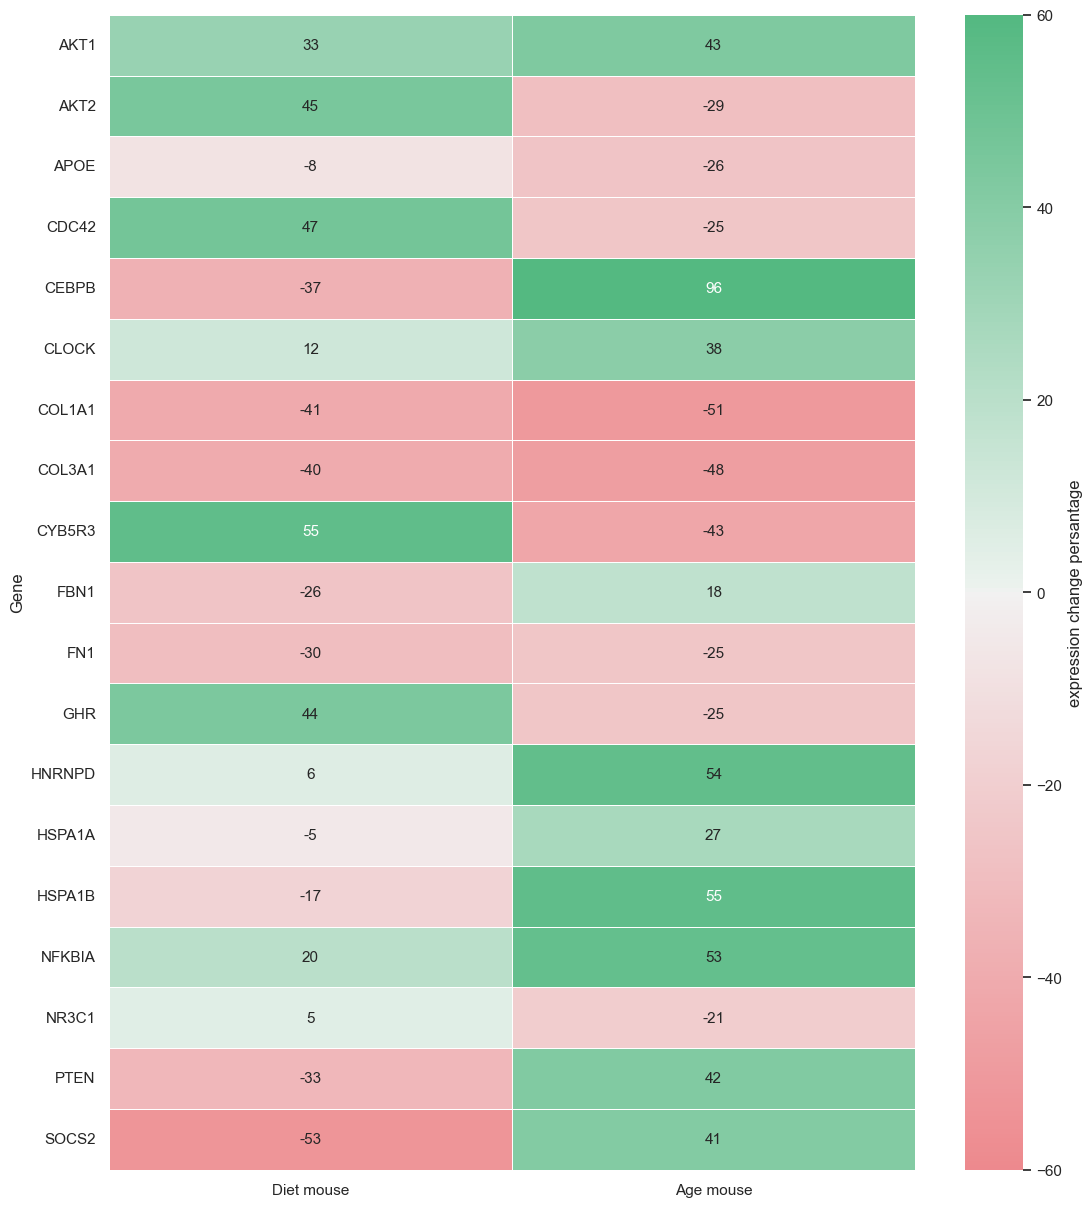

In [46]:
sns.heatmap(mouse_percentage, cmap = sns. diverging_palette ( h_neg = 10 , h_pos = 143 , s = 75 , l = 68 , sep = 1 , n =9 , as_cmap = True ), 
            vmin=-60, vmax=60, center= 0, linewidth=.5, cbar_kws={'label': 'expression change persantage'}, 
            annot = True, annot_kws={"size":11}, fmt='d')
sns.set(rc={'figure.figsize':(5,7)})

plt.show()

### Шаг 5.2. Построение графика Heatmap зависимость общих для 3х таблиц генов для человека от возрастных изменений у человека, изменений после спорта у человека

In [47]:
sport_l_cp = sport_l[['Gene', 'change percentage']].copy()
sport_l_cp = sport_l_cp.astype({'change percentage': 'float64'})
sport_l_cp. rename(columns = {'change percentage':'Sport human'}, inplace = True )

In [48]:
exp_hl_cp = exp_h_l[['Gene', 'change percentage']].copy()
exp_hl_cp['change percentage'] = exp_hl_cp['change percentage'].replace(to_replace ='%', value = '', regex = True)
exp_hl_cp = exp_hl_cp.astype({'change percentage': 'float64'})
exp_hl_cp. rename(columns = {'change percentage':'Age human'}, inplace = True )

In [49]:
sport_l_percentage = pd.pivot_table(sport_l_cp, values=['Sport human'], 
                       index='Gene', aggfunc=np.mean)

exp_hl_percentage = pd.pivot_table(exp_hl_cp, values=['Age human'], 
                       index='Gene', aggfunc=np.mean)

In [50]:
human_percentage = pd.merge(sport_l_percentage, exp_hl_percentage, on = 'Gene', how = 'inner')

In [51]:
human_percentage = human_percentage.astype({'Sport human': 'int64'})
human_percentage = human_percentage.astype({'Age human': 'int64'})

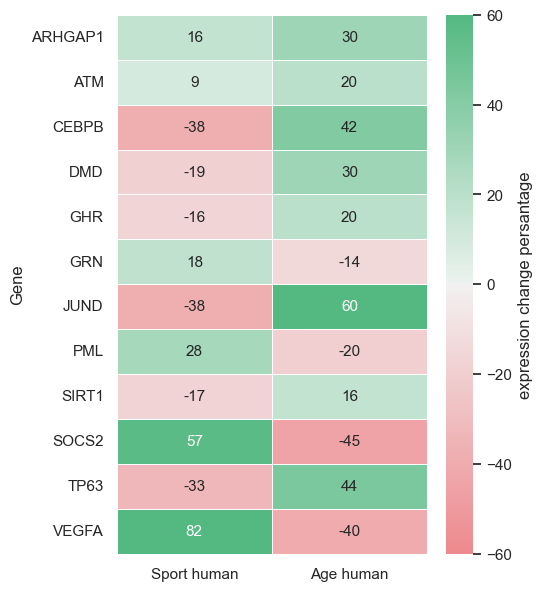

In [52]:
sns.heatmap(human_percentage, cmap = sns. diverging_palette ( h_neg = 10 , h_pos = 143 , s = 75 , l = 68 , sep = 1 , n = 9 , as_cmap = True ), 
            vmin=-60, vmax=60, center= 0, linewidth=.5, cbar_kws={'label': 'expression change persantage'}, 
            annot = True, annot_kws={"size":11}, fmt='d')
sns.set(rc={'figure.figsize':(5,5)})

plt.show()

### Шаг 6. Сохранение 4х исходных таблиц с общим 41 геном

In [57]:
d = pd.ExcelWriter('diet_41.xlsx')
diet_m_2.to_excel(d) 
d.save() 
print('DataFrame Diet_41 is written successfully to Excel File.')

DataFrame Diet_41 is written successfully to Excel File.


In [59]:
em = pd.ExcelWriter('age_mouse_41.xlsx')
exp_m_2.to_excel(em) 
em.save() 
print('DataFrame Age_Mouse_41 is written successfully to Excel File.')

DataFrame Age_Mouse_41 is written successfully to Excel File.


In [61]:
s = pd.ExcelWriter('sport_41.xlsx')
sport_h_2.to_excel(s) 
s.save() 
print('DataFrame Sport_41 is written successfully to Excel File.')

DataFrame Sport_41 is written successfully to Excel File.


In [63]:
eh = pd.ExcelWriter('age_human_41.xlsx')
expr_h_2.to_excel(eh) 
eh.save() 
print('DataFrame Age_Human_41 is written successfully to Excel File.')

DataFrame Age_Human_41 is written successfully to Excel File.
